In [2]:
import os
import random
import pandas as pd
from PIL import Image
import torch
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

WARNING  Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at 'C:\Users\alyss\AppData\Roaming\Ultralytics\settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


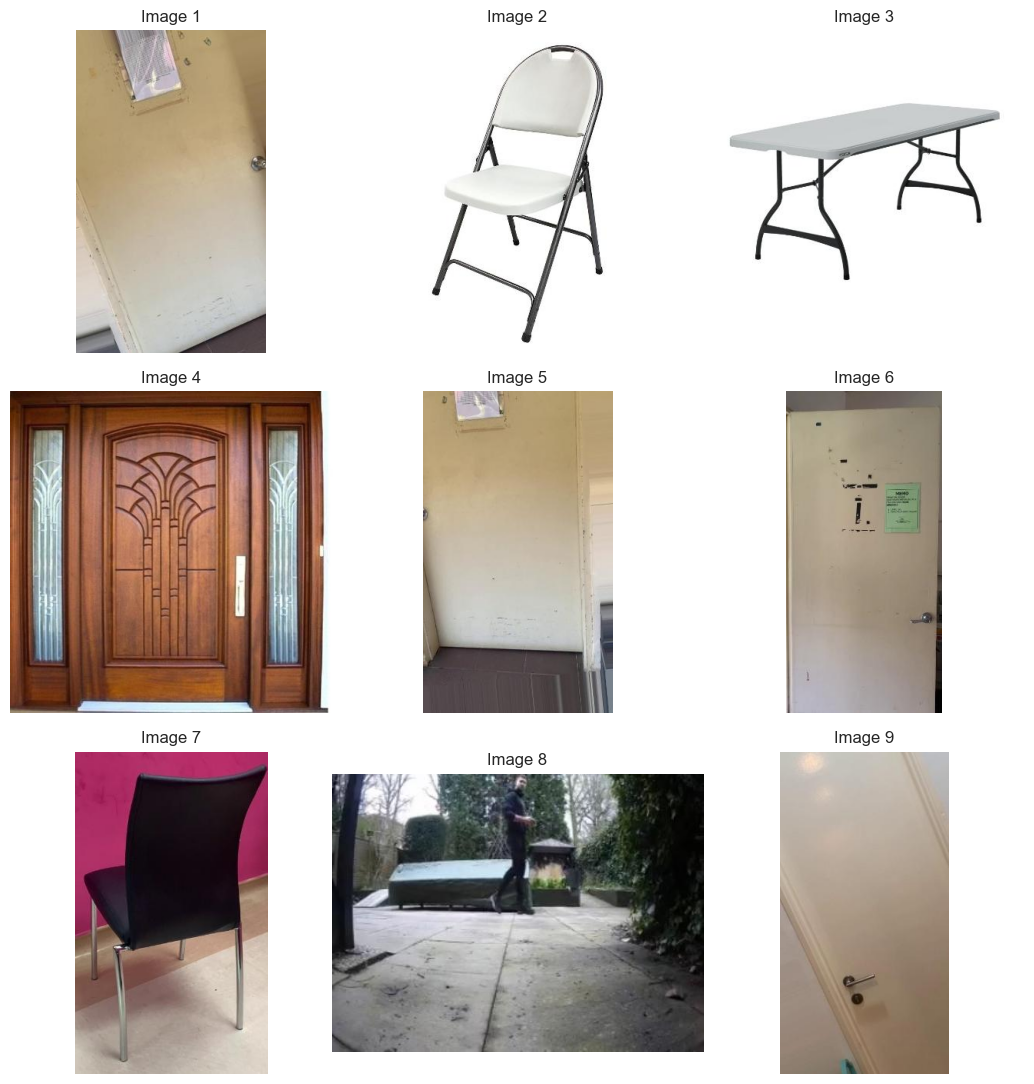

In [8]:
Image_dir = 'C:/Users/alyss/Downloads/DataSet/Final-1/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
image = cv2.imread("C:/Users/alyss/Downloads/DataSet/Final-1/train/images/00053_jpg.rf.c44d5cb395189a6e56a1b341caa9e8f0.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 279x420 and 3 channels.


100%|██████████| 83.7M/83.7M [00:28<00:00, 3.04MB/s]



image 1/1 C:\Users\alyss\Downloads\DataSet\Final-1\train\images\00053_jpg.rf.c44d5cb395189a6e56a1b341caa9e8f0.jpg: 640x448 1 bench, 1 chair, 547.0ms
Speed: 3.0ms preprocess, 547.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


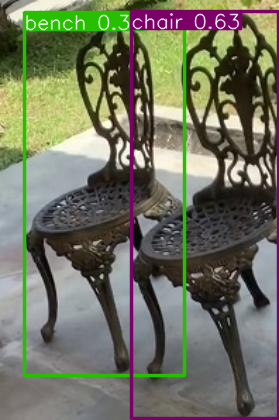

In [11]:
model = YOLO("yolov8l.pt") 

# Use the model to detect object
image = "C:/Users/alyss/Downloads/DataSet/Final-1/train/images/00053_jpg.rf.c44d5cb395189a6e56a1b341caa9e8f0.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [39]:
!pip3 uninstall ultralytics -y
!pip3 uninstall ray -y

Found existing installation: ultralytics 8.3.47
Uninstalling ultralytics-8.3.47:
  Successfully uninstalled ultralytics-8.3.47
Found existing installation: ray 2.40.0
Uninstalling ray-2.40.0:
  Successfully uninstalled ray-2.40.0


You can safely remove it manually.


In [40]:
!pip3 install ultralytics==8.0.0  
!pip3 install ray==2.0.0

  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.5 MB 2.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.0/5.5 MB 3.1 MB/s eta 0:00:02
   ----------- ---------------------------- 1.6/5.5 MB 2.9 MB/s eta 0:00:02
   --------------- ------------------------ 2.1/5.5 MB 2.7 MB/s eta 0:00:02
   ------------------- -------------------- 2.6/5.5 MB 2.7 MB/s eta 0:00:02
   ---------------------- ----------------- 3.1/5.5 MB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 3.7/5.5 MB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 4.2/5.5 MB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 4.7/5.5 MB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 5.2/5.5 MB 2.6 MB/s eta 0

ERROR: Could not find a version that satisfies the requirement ray==2.0.0 (from versions: 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0, 2.7.1, 2.7.2, 2.8.0, 2.8.1, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0, 2.20.0, 2.30.0, 2.31.0, 2.32.0rc0, 2.32.0, 2.33.0, 2.34.0, 2.35.0, 2.36.0, 2.36.1, 2.37.0, 2.38.0, 2.39.0, 2.40.0)
ERROR: No matching distribution found for ray==2.0.0


In [41]:
!pip3 install torch torchvision torchaudio

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


train_command = [
    'yolo', 'task=classify', 'mode=train', 'model=yolov8n.pt',  
    f'data={dataset.location}/data.yaml', 'epochs=25', 'imgsz=640', 
    f'device={device}', 'plots=True', 
    'batch=16',  
    'lr0=0.01',  
    'patience=5', 
    'iou=0.7'
    
]

In [4]:
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="C:/Users/alyss/Downloads/DataSet/Final-1/data.yaml",epochs = 25, batch = 16, optimizer = 'auto', lr0=0.01,  
    patience=5, iou=0.7, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.5 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/alyss/Downloads/DataSet/Final-1/data.yaml, epochs=25, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=No

In [16]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        # Check if the file exists
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Convert image from BGR (OpenCV format) to RGB (Matplotlib format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image using Matplotlib
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')  # Hide axis labels
        plt.show()  # Explicitly show the plot

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'C:/Users/alyss/Downloads/DataSet/runs/detect/train/runs/detect/train2'

# Display the images
display_images(post_training_files_path, image_files)


<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

<Figure size 1200x1200 with 1 Axes>

In [12]:
Result_Final_model = pd.read_csv('C:/Users/alyss/Downloads/DataSet/runs/detect/train/runs/detect/train2/results.csv')
Result_Final_model.tail(10)

epoch        train/box_loss        train/cls_loss  \
15                    16               0.91540               0.72652   
16                    17               0.90443               0.68156   
17                    18               0.87113               0.65435   
18                    19               0.85274               0.61880   
19                    20               0.83828               0.60912   
20                    21               0.81878               0.58484   
21                    22               0.80596               0.57178   
22                    23               0.79346               0.54809   
23                    24               0.77129               0.52557   
24                    25               0.75199               0.51797   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
15                1.4778               0.80293               0.77763   
16                1.4696               0.81430               0.77705   
17                1.4387               0.81135               0.79748   
18                1.4300               0.82186               0.81648   
19                1.4156               0.83515               0.81059   
20                1.4024               0.80772               0.81633   
21                1.3901               0.83879               0.80809   
22                1.3751               0.82095               0.82167   
23                1.3542               0.85474               0.80474   
24                1.3442               0.84007               0.80971   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
15               0.83120               0.54348                1.1378   
16               0.84278               0.56118                1.1251   
17               0.85128               0.55863                1.1270   
18               0.85761               0.57044                1.1122   
19               0.86805               0.59001                1.0626   
20               0.86212               0.58485                1.0639   
21               0.86019               0.58178                1.0728   
22               0.86476               0.59694                1.0455   
23               0.87314               0.59618                1.0577   
24               0.86941               0.60109                1.0372   

            val/cls_loss          val/dfl_loss                lr/pg0  \
15               0.92601                1.5654              0.000557   
16               0.86883                1.5579              0.000508   
17               0.84856                1.5644              0.000458   
18               0.83444                1.5484              0.000409   
19               0.79225                1.5032              0.000359   
20               0.80109                1.5008              0.000309   
21               0.79757                1.4969              0.000260   
22               0.76873                1.4758              0.000210   
23               0.75561                1.4926              0.000161   
24               0.75602                1.4708              0.000111   

                  lr/pg1                lr/pg2  
15              0.000557              0.000557  
16              0.000508              0.000508  
17              0.000458              0.000458  
18              0.000409              0.000409  
19              0.000359              0.000359  
20              0.000309              0.000309  
21              0.000260              0.000260  
22              0.000210              0.000210  
23              0.000161              0.000161  
24              0.000111              0.000111

In [20]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 10 Axes>

In [ ]:
Valid_model = YOLO('C:/Users/alyss/Downloads/DataSet/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
precision = metrics.results_dict["metrics/precision(B)"]
recall = metrics.results_dict["metrics/recall(B)"]

# Calculate F1-score
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the metrics
print("Precision (B): ", precision)
print("Recall (B): ", recall)
print("mAP50 (B): ", metrics.results_dict["metrics/mAP50(B)"])
print("mAP50-95 (B): ", metrics.results_dict["metrics/mAP50-95(B)"])
print("F1-Score (B): ", f1_score)

Ultralytics YOLOv8.0.196  Python-3.12.5 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning C:\Users\alyss\Downloads\DataSet\Final-1\valid\labels.cache... 1515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1515/1515 [00:00<?, ?it/s]
WARNING  Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 1839. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17<00:00,  5.43it/s]
                   all       1515       1839      0.832      0.807      0.858      0.592
                 chair       1515        460      0.797      0.786      0.845      0.605
                  door       1515        460      0.884      0.759   

precision(B):  0.8315012289063116
metrics/recall(B):  0.8069167040069655
metrics/mAP50(B):  0.8581032572903373
metrics/mAP50-95(B):  0.5924312435764811
